In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load dataset
agent_stats_df = pd.read_csv("VCT_2024_seoul_dataset/agents_stats.csv")
print(agent_stats_df.head())

print(agent_stats_df.info())

  agent_name  total_utilization  \
0       Omen               62.0   
1       Sova               52.0   
2      Viper               50.0   
3     Cypher               42.0   
4       Raze               41.0   

                                    map_utilizations  
0  {'Lotus': 100.0, 'Bind': 13.0, 'Sunset': 93.0,...  
1  {'Lotus': 0.0, 'Bind': 0.0, 'Sunset': 75.0, 'A...  
2  {'Lotus': 68.0, 'Bind': 90.0, 'Sunset': 0.0, '...  
3  {'Lotus': 18.0, 'Bind': 17.0, 'Sunset': 93.0, ...  
4  {'Lotus': 75.0, 'Bind': 87.0, 'Sunset': 46.0, ...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   agent_name         27 non-null     object 
 1   total_utilization  27 non-null     float64
 2   map_utilizations   27 non-null     object 
dtypes: float64(1), object(2)
memory usage: 780.0+ bytes
None


In [3]:
# data cleaning and transformations
# use ast (abstract syntax tree) lib to convert string into the dictionary

import ast

agent_stats_df['map_data'] = agent_stats_df["map_utilizations"].apply(ast.literal_eval) # evaluates the string containg python structure and converts it into corresponding python object
map_util_df = agent_stats_df['map_data'].apply(pd.Series)
agent_stats_df = pd.concat([agent_stats_df[["agent_name","total_utilization"]],map_util_df],axis = 1)

agent_stats_df.head()


,agent_name,total_utilization,Lotus,Bind,Sunset,Abyss,Icebox,Haven,Ascent
0,Omen,62.0,100.0,13.0,93.0,50.0,0.0,100.0,88.0
1,Sova,52.0,0.0,0.0,75.0,96.0,92.0,89.0,100.0
2,Viper,50.0,68.0,90.0,0.0,21.0,100.0,17.0,0.0
3,Cypher,42.0,18.0,17.0,93.0,75.0,0.0,78.0,38.0
4,Raze,41.0,75.0,87.0,46.0,0.0,0.0,6.0,0.0


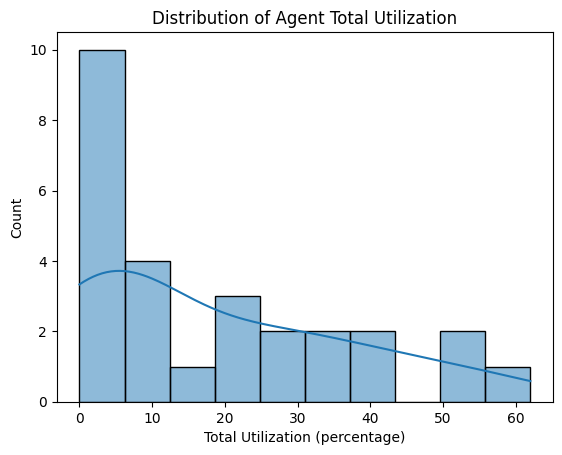

In [4]:
# Agent distribution by Total utilization
sns.histplot(agent_stats_df["total_utilization"], bins = 10, kde = True)
plt.title("Distribution of Agent Total Utilization")
plt.xlabel("Total Utilization (percentage)")
plt.ylabel("Count")
plt.show()

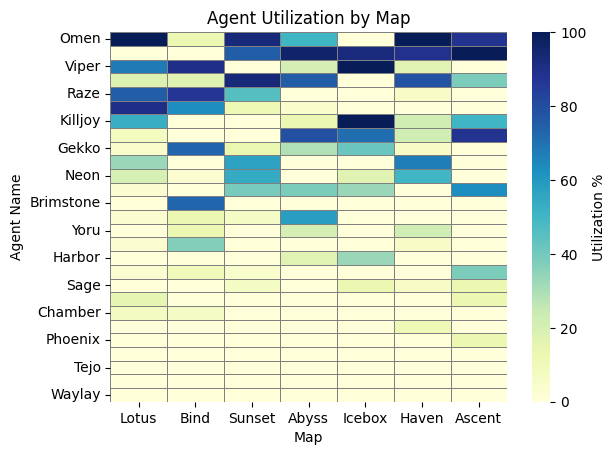

In [5]:
map_cols =[c for c in agent_stats_df.columns if c not in ['agent_name', 'total_utilization']]
sns.heatmap(agent_stats_df.set_index('agent_name')[map_cols],cmap = 'YlGnBu', linewidths= 0.5, linecolor= 'gray',cbar_kws= {'label' : "Utilization %"})
plt.title('Agent Utilization by Map')
plt.xlabel('Map')
plt.ylabel('Agent Name')
plt.show()

In [7]:
agent_stats_df

,agent_name,total_utilization,Lotus,Bind,Sunset,Abyss,Icebox,Haven,Ascent
0,Omen,62.0,100.0,13.0,93.0,50.0,0.0,100.0,88.0
1,Sova,52.0,0.0,0.0,75.0,96.0,92.0,89.0,100.0
2,Viper,50.0,68.0,90.0,0.0,21.0,100.0,17.0,0.0
3,Cypher,42.0,18.0,17.0,93.0,75.0,0.0,78.0,38.0
4,Raze,41.0,75.0,87.0,46.0,0.0,0.0,6.0,0.0
5,Fade,34.0,90.0,63.0,11.0,4.0,0.0,0.0,0.0
6,Killjoy,33.0,53.0,0.0,0.0,13.0,100.0,22.0,50.0
7,Jett,29.0,8.0,0.0,0.0,79.0,71.0,22.0,88.0
8,Gekko,27.0,5.0,73.0,14.0,29.0,42.0,6.0,0.0
9,Breach,24.0,33.0,0.0,57.0,0.0,0.0,67.0,0.0


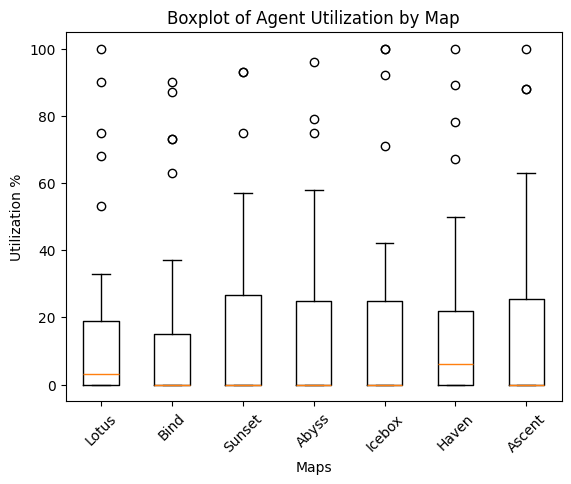

In [8]:
plt.boxplot(agent_stats_df[map_cols])
plt.xticks(ticks = range(1, len(map_cols) + 1), labels = map_cols, rotation = 45)
plt.title("Boxplot of Agent Utilization by Map")
plt.xlabel("Maps")
plt.ylabel("Utilization %")
plt.show()

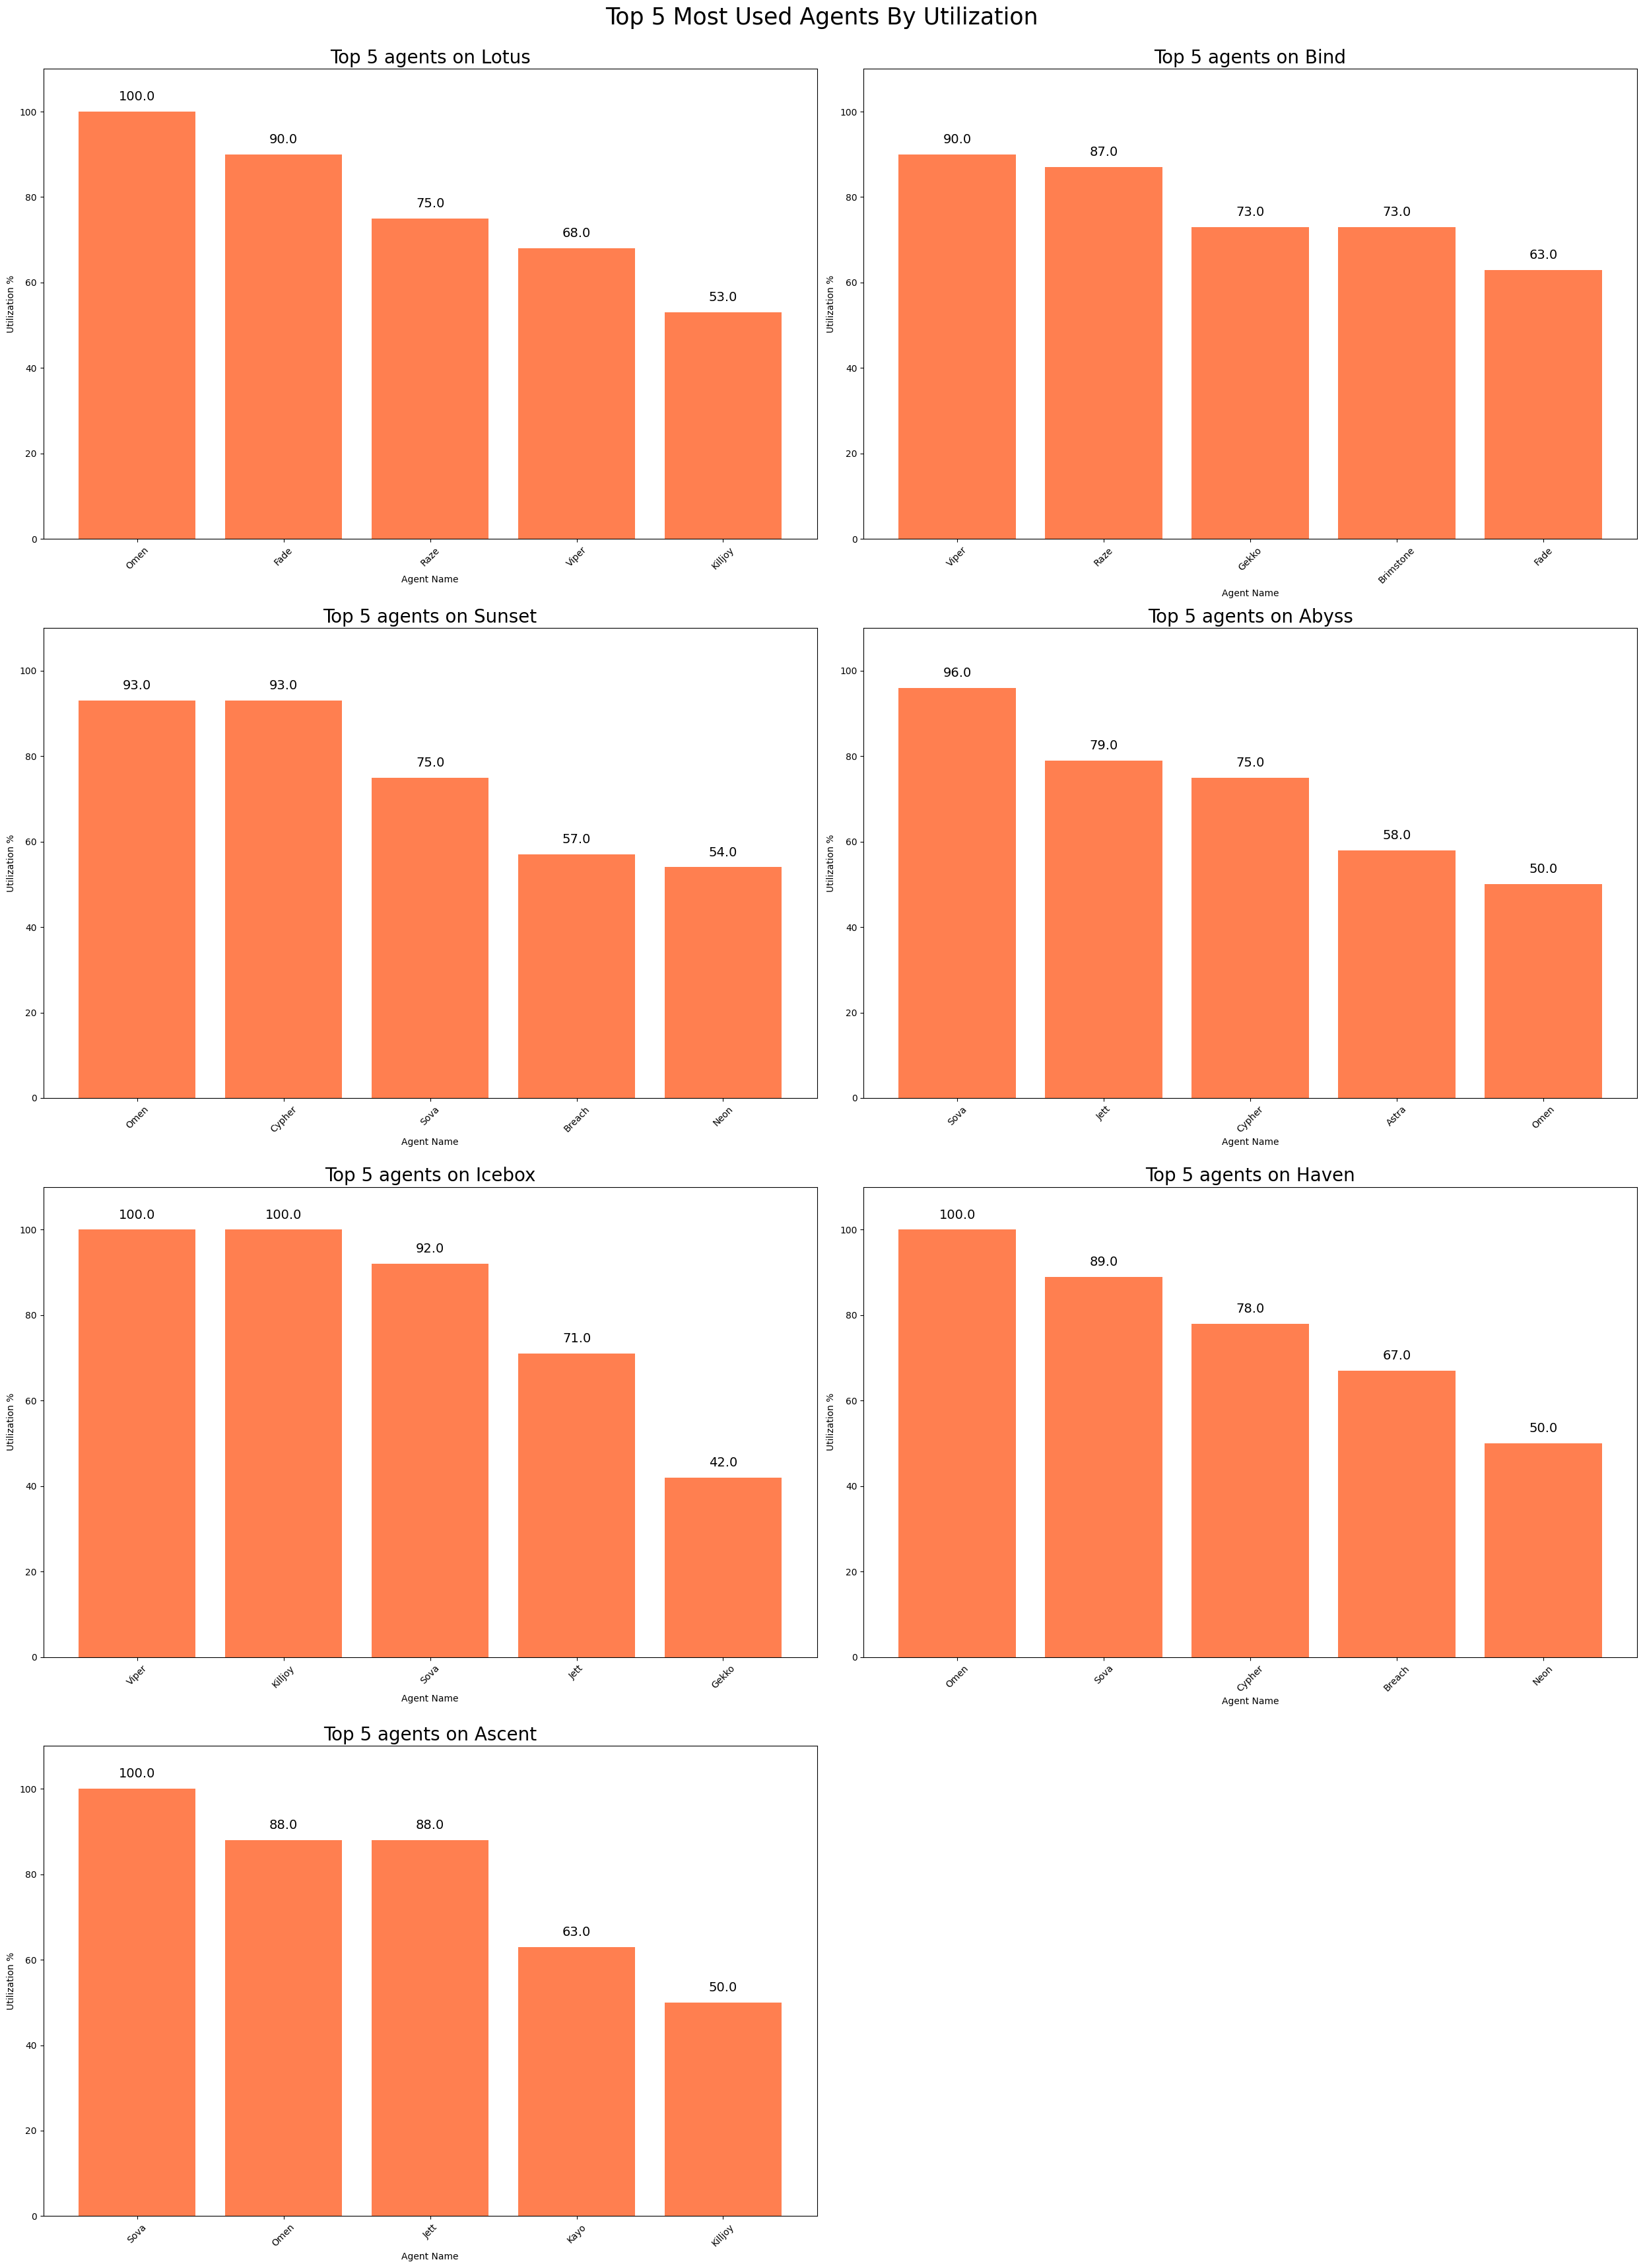

In [ ]:
top_5_per_map={}
for map_name in map_cols:
    sorted_map_df = agent_stats_df.sort_values(by = map_name, ascending=False)
    top_5 = sorted_map_df.head(5)[['agent_name', map_name]].copy()

    top_5.rename(columns= {map_name : 'Utilization(%)'}, inplace = True)

    top_5_per_map[map_name] = top_5

#top_5_per_map

# Plotting Chart visualiization for all 7 maps
fig, axes = plt.subplots(nrows = 4, ncols= 2, figsize = (25,35))
axes = axes.flatten() # Flatten the 2D array of axes for easy indexing 

for i , map_name in enumerate(map_cols):
    ax = axes[i]
    top_5_df = top_5_per_map[map_name]

    # create a bar chart
    bars = ax.bar(top_5_df['agent_name'], top_5_df['Utilization(%)'], color = 'coral')

    # set titles and labels

    ax.set_title(f"Top 5 agents on {map_name}", fontsize = 20)
    ax.set_xlabel("Agent Name")
    ax.set_ylabel("Utilization %")
    ax.set_ylim(0, 110) # Consistent y- limit for better comparision between different charts

    ax.tick_params(axis = 'x', rotation = 45) # rotates X- axis labels to 45 degree for better readability 

    # Add data labels on top of each bar
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 2, round(yval, 1), ha='center', va='bottom', fontsize=14)


# Hide the unused subplot (8th subplot in this case)
fig.delaxes(axes[-1]) # completely deletes that subplot from the figure object.

# Super title for the entire figure

plt.suptitle('Top 5 Most Used Agents By Utilization',fontsize = 25)
plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjusts spacing between subplots to prevent overlapping labels, ticks, or titles.


